## **Logistic regression**

Import useful libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import joblib

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
np.set_printoptions(precision=2, suppress=True)

### **3. Preparing the Data**

In [4]:
%store -r df

In [5]:
df.head()

,a1,a2,a3,a4,a5,a6,d1,d2
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


**Identify predictors and response variable**

Predictors

In [6]:
df.columns

Index(['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'd1', 'd2'], dtype='object')

In [7]:
predictors_list = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6']

Response variable

In [8]:
df = df.astype({"d1": str, "d2": str})
df['combined'] = df['d2'] + df['d1']

In [9]:
le = LabelEncoder()
df['combined'] = le.fit_transform(df['combined'])
df

,a1,a2,a3,a4,a5,a6,d1,d2,combined
0,35.5,0,1,0,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0,1
2,35.9,0,1,0,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0,1
4,36.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1,2
116,41.5,0,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1,2
118,41.5,0,1,1,0,1,0,1,2


In [10]:
df[['d1','d2','combined']].groupby('combined', as_index=False).first()

,combined,d1,d2
0,0,0,0
1,1,1,0
2,2,0,1
3,3,1,1


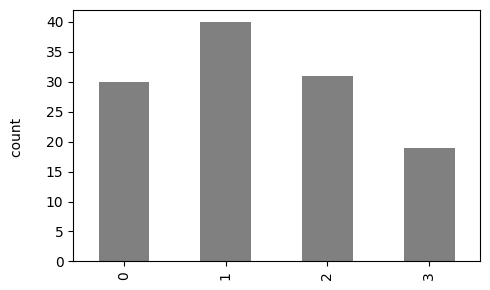

In [11]:
df['combined'].value_counts()[[0,1,2,3]].plot(figsize=(5,3), kind='bar', ylabel='count \n', color='grey')
plt.tight_layout()
plt.show()

.

In [12]:
X = df[predictors_list].values
y = df[['combined']].values

**Split data in training set and test set**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
X_train.shape, X_test.shape

((96, 6), (24, 6))

**Data standardisation**

In [15]:
ss = MinMaxScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

### **4. Training the Model**

Linear regression model fit on data

In [16]:
lr = LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=42)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

In [17]:
lr.intercept_

array([ 3.26,  1.47, -0.55, -4.18])

In [18]:
lr.coef_

array([[-0.48, -1.21, -0.1 , -2.4 , -1.48, -1.13],
       [-1.19, -0.78, -2.11,  1.12,  0.69, -0.31],
       [ 1.15, -0.12,  1.39, -0.63, -0.57,  0.84],
       [ 0.51,  2.11,  0.81,  1.92,  1.37,  0.59]])

In [19]:
y_pred_proba = lr.predict_proba(X=X_test)
y_pred_proba

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

### **5. Evaluating the Model**

**Computation of classificaton metrics**

Classification report

In [20]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



Confusion matrix

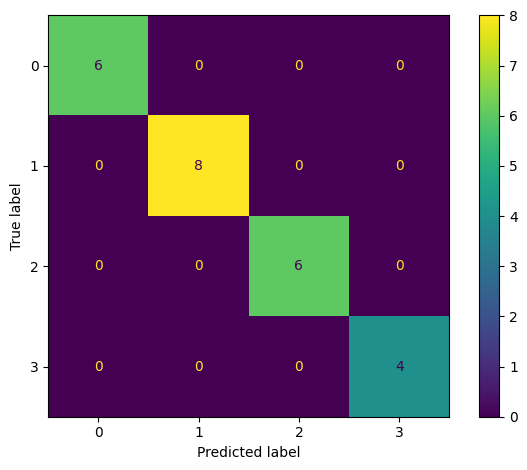

In [21]:
ConfusionMatrixDisplay.from_estimator(estimator=lr, X=X_test_std, y=y_test)
plt.tight_layout()
plt.show()

### **6. Model deployment**

Model serialization


In [22]:
joblib.dump(value=lr, filename="models/acute_inflammations_model.joblib")

['models/acute_inflammations_model.joblib']